# MONDRIAN FOREST: APPLICATION TO 3D BLOBS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np

import Mondrian
import Plot

## Blobs dataset:

In [3]:
blobs = datasets.make_blobs(n_samples=50,n_features=3,cluster_std=[1.0, 2, 0.5],random_state=50)
X = blobs[0]
y = blobs[1]

In [4]:
df_blobs = {'X1':X[:,0],'X2':X[:,1],'X3':X[:,2],'y':y}
df_blobs = pd.DataFrame(df_blobs)
df_blobs.head()

,X1,X2,X3,y
0,-5.134935,-0.736594,7.176710,1
1,0.578117,-5.933500,-5.425098,0
2,0.717602,-6.559353,-3.993709,0
3,-2.569917,-4.654979,-4.846405,0
4,0.647538,-5.505340,-3.212045,0


<IPython.core.display.Javascript object>


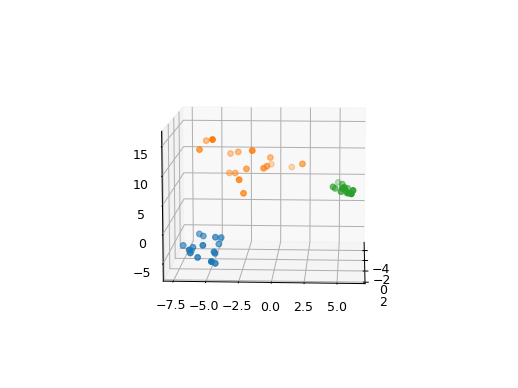

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df_blobs.query('y==0')['X1'],df_blobs.query('y==0')['X2'],df_blobs.query('y==0')['X3'])
ax.scatter(df_blobs.query('y==1')['X1'],df_blobs.query('y==1')['X2'],df_blobs.query('y==1')['X3'])
ax.scatter(df_blobs.query('y==2')['X1'],df_blobs.query('y==2')['X2'],df_blobs.query('y==2')['X3'])

In [6]:
import Matrix

dist_matrix = Matrix.distance_matrix(X)

print(len(dist_matrix))
dist_matrix.head()

61250


,index1,index2,dist,magnitude_norm_vect,index_norm_vect,x1_0,x1_1,x1_2,x2_0,x2_1,...,x_cut_1,x_cut_2,norm_vect_0,norm_vect_1,norm_vect_2,point_0,point_1,point_2,point_index,dist_point_cut
0,1,0,14.780135,-0.454764,0,0.578117,-5.933500,-5.425098,-5.134935,-0.736594,...,-3.335047,0.875806,0.386536,-0.351614,-0.852618,-1.994141,2.07436,9.4038,49,-9.063266
1,2,0,13.890104,-0.681259,1,0.717602,-6.559353,-3.993709,-5.134935,-0.736594,...,-3.647973,1.591501,0.421346,-0.419202,-0.804200,-1.994141,2.07436,9.4038,49,-8.591074
2,2,1,1.568446,-1.747770,2,0.717602,-6.559353,-3.993709,0.578117,-5.933500,...,-6.246426,-4.709404,0.088932,-0.399027,0.912616,-1.994141,2.07436,9.4038,49,9.324762
3,3,0,12.903037,-1.032871,3,-2.569917,-4.654979,-4.846405,-5.134935,-0.736594,...,-2.695786,1.165152,0.198792,-0.303679,-0.931805,-1.994141,2.07436,9.4038,49,-8.755996
4,3,1,3.446682,-1.916538,4,-2.569917,-4.654979,-4.846405,0.578117,-5.933500,...,-5.294240,-5.135752,-0.913352,0.370943,0.167899,-1.994141,2.07436,9.4038,49,6.086243


## MONDRIAN CLUSTERING FOREST

In [7]:
# parameter setting
namefile =  'example\Blobs3D\Blobs3D' 
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [8]:
# the forest consists of 5 trees
number_of_iterations = 5
Mondrian.mondrian_forest(namefile,X,t0,lifetime,exp,metric,number_of_iterations)

Tree number 1
PARTITIONING:
total number of splits: 28
MERGING:
range of possible number of clusters: 1-21
Tree number 2
PARTITIONING:
total number of splits: 28
MERGING:
range of possible number of clusters: 1-21
Tree number 3
PARTITIONING:
total number of splits: 32
MERGING:
range of possible number of clusters: 1-17
Tree number 4
PARTITIONING:
total number of splits: 31
MERGING:
range of possible number of clusters: 1-18
Tree number 5
PARTITIONING:
total number of splits: 32
MERGING:
range of possible number of clusters: 1-17


### DETERMINATION OF THE NUMBER OF CLUSTERS

Besides the creation of four .json files at each iteration of the *mondrian_tree* function, two more files are created at the end of the process. 'Blobs3D_AMI.json' stores the values of the adjusted mutual information computed for each pair of tree outcomes, for each considered number of clusters in which the dataset can be divided. 'Blobs3D_AMI.txt' stores their mean value and standard deviation (always separately, for each possible number of clusters).

In [9]:
ami = pd.read_csv(namefile+'_AMI.txt',sep='\t')
ami.head()

,AMI_mean,AMI_std
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,0.980380,0.025329
4,0.981704,0.023621


The plot of the averaged AMI coefficient vs the number of clusters is shown in the following. The first row of the ami dataframe, that corresponds to all the data belonging to a single cluster, is not plotted.

<IPython.core.display.Javascript object>


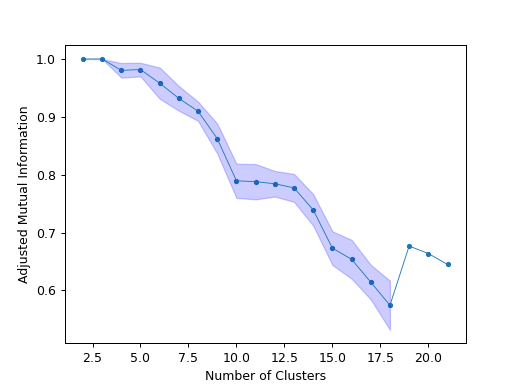

In [10]:
Plot.plot_AMI(namefile)

### PLOT OF SINGLE TREE RESULTS

In [11]:
# read all tree outputs
list_part = []
list_m = []
list_p_tot = []
list_m_leaf_tot = []
for k in range(number_of_iterations):
    name = namefile+'_lambda'+str(lifetime)+'_exp'+str(exp)+'_'+metric+'_'+str(k+1)
    part,m,list_p,list_m_leaf = Mondrian.read_tree(name)
    list_part.append(part)
    list_m.append(m)
    list_p_tot.append(list_p)
    list_m_leaf_tot.append(list_m_leaf)

#### DATA CLASSIFICATION PLOT

<IPython.core.display.Javascript object>


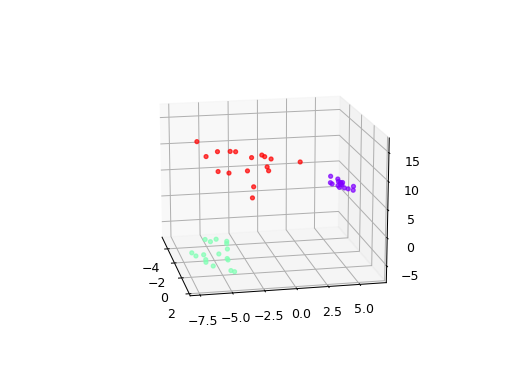

<IPython.core.display.Javascript object>


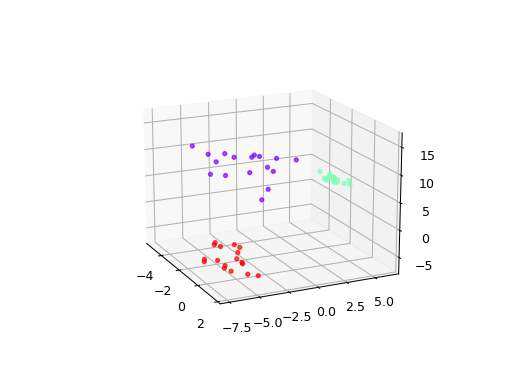

<IPython.core.display.Javascript object>


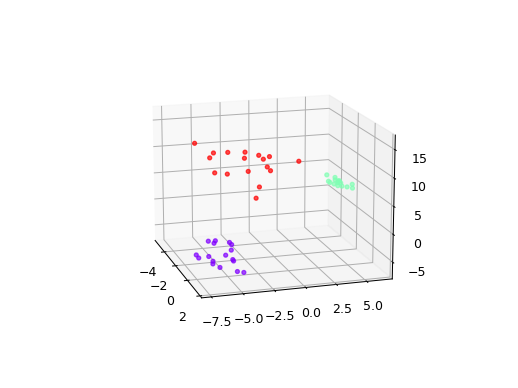

<IPython.core.display.Javascript object>


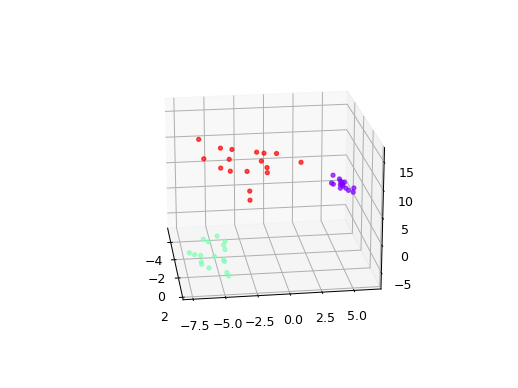

<IPython.core.display.Javascript object>


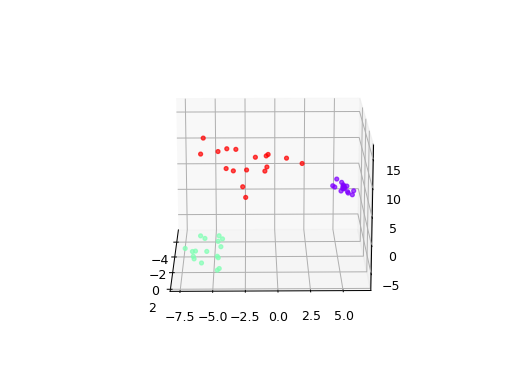

In [13]:
number_of_clusters = 3
for k in range(number_of_iterations):
    part = list_part[k]
    m = list_m[k]
    list_p = list_p_tot[k]
    list_m_leaf = list_m_leaf_tot[k]
    Plot.plot3D(list_m_leaf,list_p,part,number_of_clusters,False,True)

#### SPACE CLASSIFICATION PLOT

In [14]:
# select a specific tree output 
k = 0
part = list_part[k]
m = list_m[k]
list_p = list_p_tot[k]
list_m_leaf = list_m_leaf_tot[k]

<IPython.core.display.Javascript object>


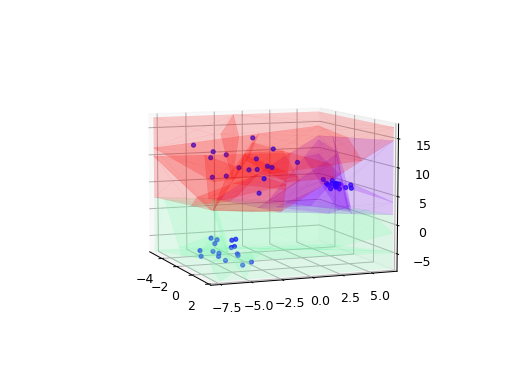

<IPython.core.display.Javascript object>


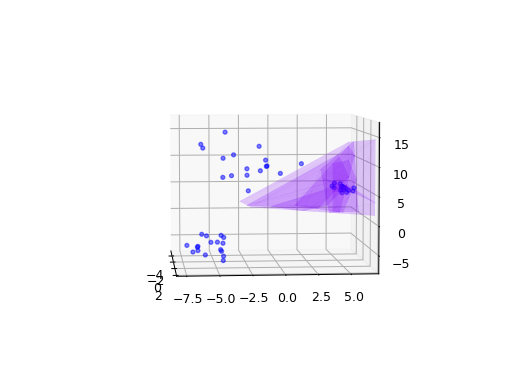

<IPython.core.display.Javascript object>


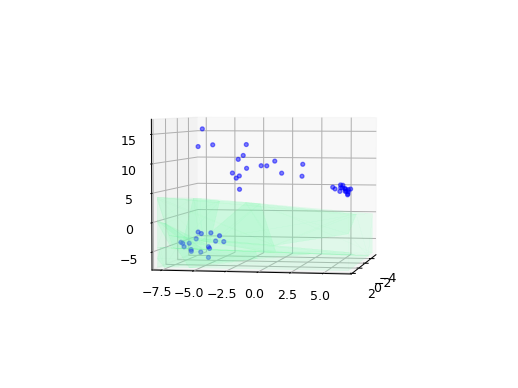

<IPython.core.display.Javascript object>


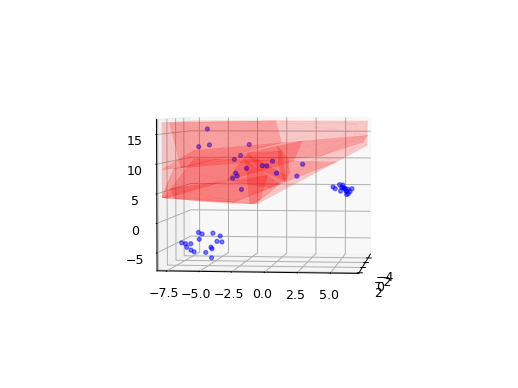

In [15]:
number_of_clusters = 3
Plot.plot3D(list_m_leaf,list_p,part,number_of_clusters,True,False)